In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data

Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  Hours_Work  \
0          60            110        130              409         0.0   
1          60            117        145              479         0.0   
2          60            103        135              340         8.0   
3          45            109        175              282         8.0   
4          45            117        148              406         0.0   
..        ...            ...        ...              ...         ...   
158        60            105        140              290         7.0   
159        60            110        145              300         7.0   
160        60            115        145              310         8.0   
161        75            120        150              320         0.0   
162        75            125        150              330         8.0   

     Hours_Sleep  
0            8.0  
1            8.0  
2            7.5  
3            8.0  
4            6.5  
..           ...  
158          8.0  
159          8.0  
160          8.0  
161          8.0  
162          8.0  

[163 rows x 6 columns]

In [3]:
data.describe()

Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  163.000000     163.000000  163.000000       163.000000  163.000000   
mean    64.263804     107.723926  134.226994       382.368098    4.386503   
std     42.994520      14.625062   16.403967       274.227106    3.923772   
min     15.000000      80.000000  100.000000        50.000000    0.000000   
25%     45.000000     100.000000  124.000000       256.500000    0.000000   
50%     60.000000     105.000000  131.000000       320.000000    5.000000   
75%     60.000000     111.000000  141.000000       388.500000    8.000000   
max    300.000000     159.000000  184.000000      1860.000000   11.000000   

       Hours_Sleep  
count   163.000000  
mean      7.680982  
std       0.663934  
min       5.000000  
25%       7.500000  
50%       8.000000  
75%       8.000000  
max      12.000000

# Percentiles describe the value that a given percent of the values are lower than

In [4]:
import numpy as np
Max_Pulse = data['Max_Pulse']
percentile10 = np.percentile(Max_Pulse, 10)
percentile10

120.0

The 10% percentile of `Max_Pulse` is 120. Meaning, 10% of all training sessions have a `Max_Pulse` of 120 or lower

# Standard deviation - how spread out the observations are?

In [9]:
std = np.std(data)
std

Duration            42.862432
Average_Pulse       14.580131
Max_Pulse           16.353571
Calorie_Burnage    273.384624
Hours_Work           3.911718
Hours_Sleep          0.661895
dtype: float64

# Coefficient of Variation - how large the standard deviation is:
$$
\text{Coefficient of Variantion} = \frac{\text{Standard Deviation}}{\text{Mean}}
$$

In [10]:
cv = np.std(data) / np.mean(data)
cv

C:\Users\acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Duration           0.666976
Average_Pulse      0.135347
Max_Pulse          0.121835
Calorie_Burnage    0.714978
Hours_Work         0.891762
Hours_Sleep        0.086173
dtype: float64

See that variables `Duration`, `Calorie_Burnage`, `Hours_Work` has a high Standard Deviation compared to others

In [11]:
variance = np.var(data)
variance

Duration            1837.188076
Average_Pulse        212.580225
Max_Pulse            267.439271
Calorie_Burnage    74739.152847
Hours_Work            15.301536
Hours_Sleep            0.438105
dtype: float64

# Correlation - relationship between 2 variables
Correlation Coefficient - [-1, 1]

* 1 - perfect linear relationship 
* 0 - no relationship
* -1 - perfect negative relationship(Less hours worked, leads to higher calorie burnage)

   Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  Hours_Work  \
0        30             80        120              240          10   
1        45             85        120              250          10   
2        45             90        130              260           8   
3        60             95        130              270           8   
4        60            100        140              280           0   
5        60            105        140              290           7   
6        60            110        145              300           7   
7        45            115        145              310           8   
8        60            120        150              320           0   
9        45            125        150              330           8   

   Hours_Sleep  
0            7  
1            7  
2            7  
3            7  
4            7  
5            8  
6            8  
7            8  
8            8  
9            8  


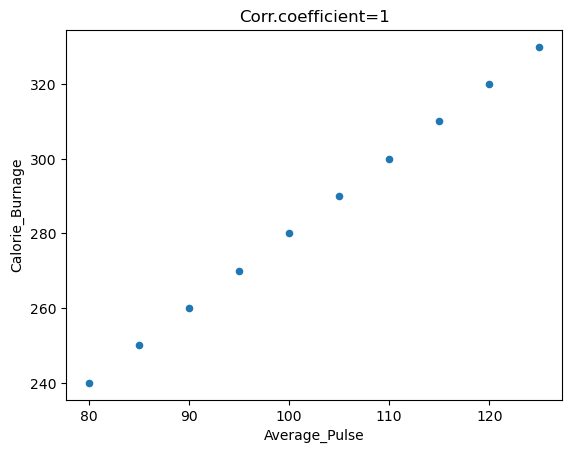

In [7]:
# Perfect Linear Relationshipp
import matplotlib.pyplot as plt

data10 = pd.read_csv('data10.csv')
print(data10)

data10.plot(x='Average_Pulse', y='Calorie_Burnage', kind='scatter')
plt.title('Corr.coefficient=1')
plt.show()

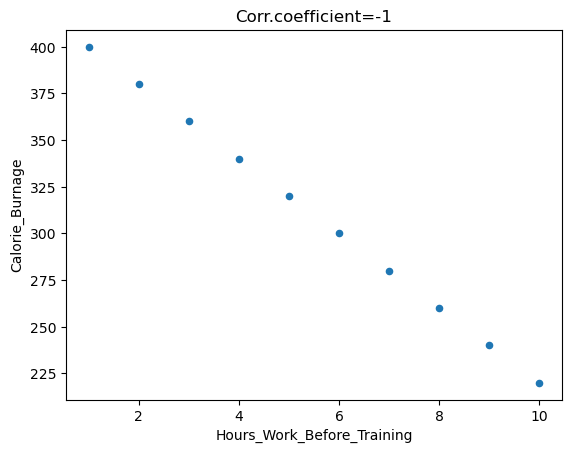

In [8]:
# Perfect negative relationship
negative_corr = {'Hours_Work_Before_Training': [10,9,8,7,6,5,4,3,2,1],
'Calorie_Burnage': [220,240,260,280,300,320,340,360,380,400]}
negative_corr = pd.DataFrame(data=negative_corr)

negative_corr.plot(x='Hours_Work_Before_Training', y='Calorie_Burnage', kind='scatter')
plt.title('Corr.coefficient=-1')
plt.show()

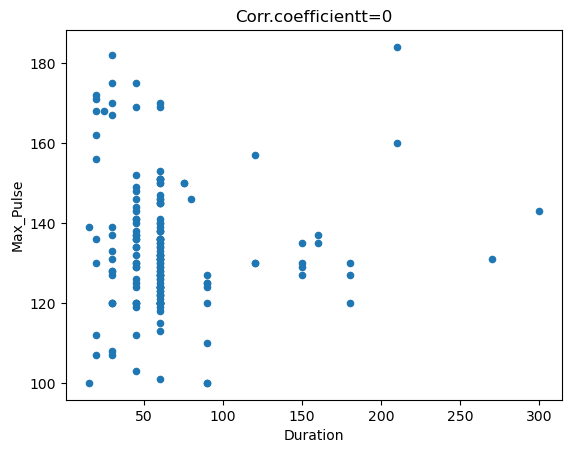

In [10]:
# No Linear Relathionship
data.plot(x='Duration', y='Max_Pulse', kind='scatter')
plt.title('Corr.coefficientt=0')
plt.show()

# Correlation Matrix - table showing corr coefficients between variables

In [12]:
Corr_matrix = round(data.corr(), 2)
print(Corr_matrix)

                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration             1.00          -0.17       0.00             0.89   
Average_Pulse       -0.17           1.00       0.79             0.02   
Max_Pulse            0.00           0.79       1.00             0.20   
Calorie_Burnage      0.89           0.02       0.20             1.00   
Hours_Work          -0.12          -0.28      -0.27            -0.14   
Hours_Sleep          0.07           0.03       0.09             0.08   

                 Hours_Work  Hours_Sleep  
Duration              -0.12         0.07  
Average_Pulse         -0.28         0.03  
Max_Pulse             -0.27         0.09  
Calorie_Burnage       -0.14         0.08  
Hours_Work             1.00        -0.14  
Hours_Sleep           -0.14         1.00  


<AxesSubplot:>

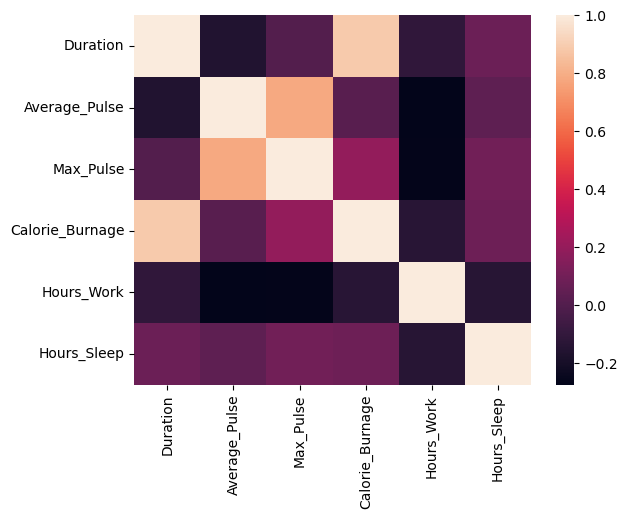

In [17]:
import seaborn as sns

corr_data = data.corr()

sns.heatmap(corr_data)

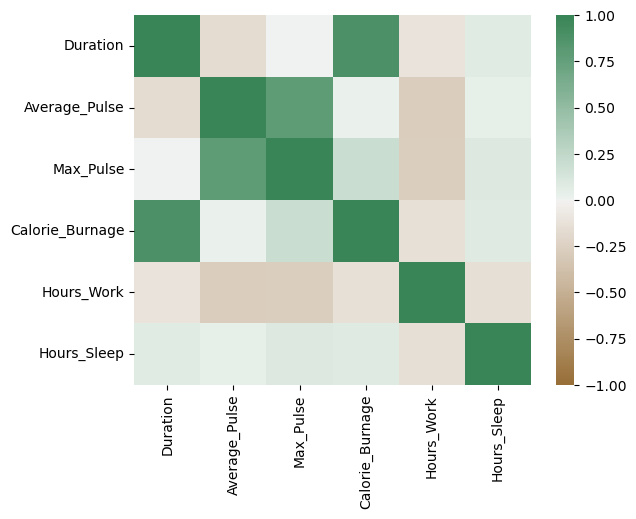

In [21]:
heatmap = sns.heatmap(corr_data, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500))
plt.show()

# Statistics Correlation vs Causality(причинно-следственная связь)
Correlation does not imply causality

In [22]:
Drowning_Accident = [20,40,60,80,100,120,140,160,180,200] # Consider summer
Ice_Cream_Sale = [20,40,60,80,100,120,140,160,180,200]
Drowning = {'Drowning_Accident': Drowning_Accident,
           'Ice_Cream_Sale': Ice_Cream_Sale}
Drowning = pd.DataFrame(data=Drowning)
Drowning

Drowning_Accident  Ice_Cream_Sale
0                 20              20
1                 40              40
2                 60              60
3                 80              80
4                100             100
5                120             120
6                140             140
7                160             160
8                180             180
9                200             200

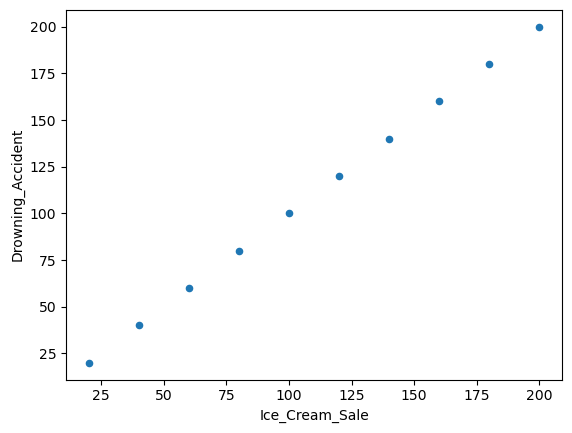

Drowning_Accident  Ice_Cream_Sale
Drowning_Accident                1.0             1.0
Ice_Cream_Sale                   1.0             1.0

In [24]:
Drowning.plot(x='Ice_Cream_Sale', y='Drowning_Accident', kind='scatter')
plt.show()

corr_beach=Drowning.corr()
corr_beach

## Correlation is a number that measures how closely the data are related

## Causality is the conclusion that x causes y